In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import random
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### conncatinate clean files

In [16]:
data1 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_1.txt', names =['sentence', 'intent'])
data2 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_2.txt', names =['sentence', 'intent'])
data3 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_3.txt', names =['sentence', 'intent'])
data4 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_4.txt', names =['sentence', 'intent'])
data5 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_5.txt', names =['sentence', 'intent'])
data6 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_6.txt', names =['sentence', 'intent'])
data7 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_7.txt', names =['sentence', 'intent'])
data8 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_8.txt', names =['sentence', 'intent'])
data9 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_9.txt', names =['sentence', 'intent'])
data10 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_10.txt', names =['sentence', 'intent'])

In [17]:
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10], ignore_index=True)
data.index

RangeIndex(start=0, stop=257590, step=1)

In [18]:
data

,sentence,intent
0,sentence,intent
1,woman complain cleaning house amp man always t...,Neither
2,boy dats cold tyga dwn bad cuffin dat hoe st plac,Offensive
3,dawg sbaby life ever fuck bitch sta cry confu...,Offensive
4,look like tranni,Offensive
...,...,...
257585,white male one hell drug,No Hate
257586,bitch crabby stop say,No Hate
257587,know done good job work scare someone bad flip...,No Hate
257588,man throwing shit tap,No Hate


In [31]:
label_counts = data.intent.value_counts()
label_counts

Offensive            68219
No Hate              59714
Not offensive        45513
Hate                 36808
Neither              21065
Normal                8209
Not cyberbullying     7790
Cyberbullying         7601
Sexism                1716
Racism                 945
intent                  10
Name: intent, dtype: int64

In [32]:
data = data[data['intent'].isin(label_counts[label_counts > 10].index)]
data.head()

,sentence,intent
1,woman complain cleaning house amp man always t...,Neither
2,boy dats cold tyga dwn bad cuffin dat hoe st plac,Offensive
3,dawg sbaby life ever fuck bitch sta cry confu...,Offensive
4,look like tranni,Offensive
5,shit hear might true might faker bitch told ya,Offensive


In [33]:
data.to_csv(r'/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_All.txt', header=True, index=False, sep=',', mode='a')

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/clean/Dataset_All.txt')
df

,sentence,intent
0,woman complain cleaning house amp man always t...,Neither
1,boy dats cold tyga dwn bad cuffin dat hoe st plac,Offensive
2,dawg sbaby life ever fuck bitch sta cry confu...,Offensive
3,look like tranni,Offensive
4,shit hear might true might faker bitch told ya,Offensive
...,...,...
257575,white male one hell drug,No Hate
257576,bitch crabby stop say,No Hate
257577,know done good job work scare someone bad flip...,No Hate
257578,man throwing shit tap,No Hate


### conncatinate tokenize files

In [20]:
tokenize1 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset1_tokenized.txt', names =['sentence', 'intent'])
tokenize2 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset2_tokenized.txt', names =['sentence', 'intent'])
tokenize3 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset3_tokenized.txt', names =['sentence', 'intent'])
tokenize4 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset4_tokenized.txt', names =['sentence', 'intent'])
tokenize5 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset5_tokenized.txt', names =['sentence', 'intent'])
tokenize6 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset6_tokenized.txt', names =['sentence', 'intent'])
tokenize7 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset7_tokenized.txt', names =['sentence', 'intent'])
tokenize8 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset8_tokenized.txt', names =['sentence', 'intent'])
tokenize9 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset9_tokenized.txt', names =['sentence', 'intent'])
tokenize10 = pd.read_csv('/content/drive/MyDrive/Final Data MSc Project/tokenize/dataset10_tokenized.txt', names =['sentence', 'intent'])

In [21]:
tokenize = pd.concat([tokenize1,tokenize2,tokenize3,tokenize4,tokenize5,tokenize6,tokenize7,tokenize8,tokenize9,tokenize10], ignore_index=True)
tokenize.index

RangeIndex(start=0, stop=257590, step=1)

In [22]:
tokenize

,sentence,intent
0,input_ids,intent
1,"[101, 2450, 17612, 9344, 2160, 23713, 2158, 24...",2
2,"[101, 2879, 23755, 2015, 3147, 5939, 3654, 104...",1
3,"[101, 4830, 27767, 24829, 21275, 2166, 2412, 6...",1
4,"[101, 2298, 2066, 25283, 3490, 102]",1
...,...,...
257585,"[101, 2317, 3287, 2028, 3109, 4319, 102]",5
257586,"[101, 7743, 18081, 3762, 2644, 2360, 102]",5
257587,"[101, 2113, 2589, 2204, 3105, 2147, 12665, 261...",5
257588,"[101, 2158, 6886, 4485, 11112, 102]",5


In [23]:
label_counts = tokenize.intent.value_counts()
label_counts

1         68219
5         59714
3         45513
0         36808
2         21065
4          8209
8          7790
9          7601
7          1716
6           945
intent       10
Name: intent, dtype: int64

In [24]:
tokenize = tokenize[tokenize['intent'].isin(label_counts[label_counts > 10].index)]
tokenize.head()

,sentence,intent
1,"[101, 2450, 17612, 9344, 2160, 23713, 2158, 24...",2
2,"[101, 2879, 23755, 2015, 3147, 5939, 3654, 104...",1
3,"[101, 4830, 27767, 24829, 21275, 2166, 2412, 6...",1
4,"[101, 2298, 2066, 25283, 3490, 102]",1
5,"[101, 4485, 2963, 2453, 2995, 2453, 8275, 2099...",1


In [28]:
tokenize.to_csv(r'/content/drive/MyDrive/Final Data MSc Project/tokenize/Tokenize_All.txt', header=True, index=False, sep=',', mode='a')

### Postponed balancing

In [29]:
df1 = pd.read_csv("/content/drive/MyDrive/Final Data MSc Project/tokenize/Tokenize_All.txt")
df1

,sentence,intent
0,"[101, 2450, 17612, 9344, 2160, 23713, 2158, 24...",2
1,"[101, 2879, 23755, 2015, 3147, 5939, 3654, 104...",1
2,"[101, 4830, 27767, 24829, 21275, 2166, 2412, 6...",1
3,"[101, 2298, 2066, 25283, 3490, 102]",1
4,"[101, 4485, 2963, 2453, 2995, 2453, 8275, 2099...",1
...,...,...
257575,"[101, 2317, 3287, 2028, 3109, 4319, 102]",5
257576,"[101, 7743, 18081, 3762, 2644, 2360, 102]",5
257577,"[101, 2113, 2589, 2204, 3105, 2147, 12665, 261...",5
257578,"[101, 2158, 6886, 4485, 11112, 102]",5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


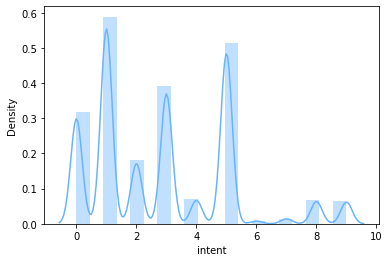

In [30]:
sns.distplot(df1['intent'],bins=20,color='#66b3ff')

In [36]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df1['sentence']).reshape(-1, 1), np.array(df1['intent']).reshape(-1, 1));
postponed_balancing_data = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['sentence', 'intent']);

In [38]:
postponed_balancing_data.intent.value_counts()

2    68219
1    68219
0    68219
3    68219
4    68219
5    68219
7    68219
6    68219
8    68219
9    68219
Name: intent, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


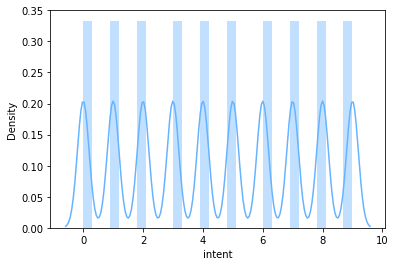

In [42]:
sns.distplot(postponed_balancing_data['intent'],bins=30,color='#66b3ff')

### split train, test and validation

In [44]:
postponed_balancing_data.head()

,sentence,intent
0,"[101, 2450, 17612, 9344, 2160, 23713, 2158, 24...",2
1,"[101, 2879, 23755, 2015, 3147, 5939, 3654, 104...",1
2,"[101, 4830, 27767, 24829, 21275, 2166, 2412, 6...",1
3,"[101, 2298, 2066, 25283, 3490, 102]",1
4,"[101, 4485, 2963, 2453, 2995, 2453, 8275, 2099...",1


In [45]:
df_train, df_test = train_test_split(postponed_balancing_data, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)
df_train.shape, df_val.shape, df_test.shape

((409314, 2), (136438, 2), (136438, 2))

In [54]:
df_train.to_csv("/content/drive/MyDrive/Final Data MSc Project/split_data/df_train.csv",index=False)

In [55]:
df_val.to_csv("/content/drive/MyDrive/Final Data MSc Project/split_data/df_val.csv",index=False)

In [56]:
df_test.to_csv("/content/drive/MyDrive/Final Data MSc Project/split_data/df_test.csv",index=False)